In [1]:
#Importing the required Libraries
import pandas as pd
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

#plt.rcParams['figure.figsize'] = (16, 8)
#plt.style.use('fivethirtyeight')


import warnings
warnings.filterwarnings('ignore')

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(rc={'figure.figsize':(8,8)})

In [8]:
df = pd.read_csv("data.csv")
df

,price,mileage,Trim,Transmission,Engine,Drivetrain,VIN,Fuel Type,Exterior Color,Interior Color,Condition,Mileage,Gas Mileage,Body Style,Doors,Stock #,Cabin,Bed,Rear Wheel
0,"$4,999","149,499 miles",Komfort,automatic,I-4 cyl2.0L,FWD,WVWJK73C29P002740,gasoline,Island Gray,Black,used,149499.0,19 city / 29 hwy,sedan,4.0,PN21559B,NaN,NaN,NaN
1,"$4,999","92,468 miles",SEL,automatic,Duratec 3.0L V6 24V,FWD,1FAFP24145G107125,gasoline,Redfire Clearcoat Metallic,Shale,used,92468.0,19 city / 26 hwy,sedan,4.0,27470B,NaN,NaN,NaN
2,"$4,998","172,962 miles",LX,manual,2.0L 4 Cylinder Engine,FWD,KNAFT4A24D5717273,gasoline,Clear White,Stone,used,172962.0,25 city / 34 hwy,sedan,4.0,D5717273A,NaN,NaN,NaN
3,"$4,799","86,905 miles",S,manual,1.6L 4 Cylinder Engine,FWD,3FADP4AJ7FM104573,gasoline,Black,Smoke Storm,used,86905.0,NaN,sedan,4.0,FM104573,NaN,NaN,NaN
4,"$3,980","156,281 miles",GLI,automatic,2.0L 4 Cylinder Engine,FWD,3VWXJ71K86M764685,gasoline,SHADOW BLUE,NaN,used,156281.0,22 city / 29 hwy,sedan,4.0,40706,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30299,"$30,998","35,749 miles",V6 SEL 4Motion,automatic,3.6L,AWD,1V2ME2CA9LC232617,gasoline,Black,BLACK,used,35749.0,16 city / 22 hwy,suv,4.0,24806832,NaN,NaN,NaN
30300,"$30,998","22,132 miles",Pro S,automatic,0.0L,RWD,WVGKMPE29MP062795,electric,White,GRAY,used,22132.0,104 city / 89 hwy,suv,4.0,25181004,NaN,NaN,NaN
30301,"$26,998","11,799 miles",Limited,automatic,2.0L,AWD,4S3GTAU63M3700402,gasoline,Blue,TAN,used,11799.0,28 city / 36 hwy,wagon,4.0,25133659,NaN,NaN,NaN
30302,"$48,998","25,185 miles",RST,automatic,3.0L,4X4,3GCUYEET5MG330373,diesel,White,BLACK,used,25185.0,22 city / 26 hwy,pickup,4.0,24985150,crew,regular,single


In [9]:
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')

df['price'] = pd.to_numeric(df['price'])

In [10]:
df['mileage'] = df['mileage'].str.replace('miles', '')
df['mileage'] = df['mileage'].str.replace(',', '')

df['mileage'] = pd.to_numeric(df['mileage'])

In [11]:
df = df.dropna(subset=['Trim'])

In [12]:
df = df.dropna(subset=['Transmission'])

for i in df['Transmission'].unique():
    print(i, end=': ')
    print(sum(df['Transmission'] == str(i)))

automatic: 29530
manual: 412


In [13]:
df = df.dropna(subset=['Engine'])

In [14]:
df = df.dropna(subset=['Drivetrain'])

for i in df['Drivetrain'].unique():
    print(i, end=': ')
    print(sum(df['Drivetrain'] == str(i)))

FWD: 12107
RWD: 4260
AWD: 6763
4X4: 5895
4WD: 67
4X2: 52


In [ ]:
#no action with 'VIN'

In [15]:
df["Fuel Type"].fillna("gasoline", inplace = True)

In [16]:
df = df.dropna(subset=['Exterior Color'])
df = df.dropna(subset=['Interior Color'])


In [ ]:
#no action with 'Condition'

In [17]:
df = df.drop(['Mileage'], axis=1)

In [18]:
df = df.dropna(subset=['Gas Mileage'])

In [19]:
def str_to_num(x):
    res = []
    if type(x) == str:
        res = [int(i) for i in x.split() if i.isdigit()]
    else:
        return 0
    return res[0]/res[1]

df['Gas Mileage'] = df['Gas Mileage'].apply(str_to_num)

In [20]:
df = df.dropna(subset=['Body Style'])

In [21]:
#no action with 'Doors'

In [22]:
#no action with 'Stock #'

In [23]:
df["Cabin"].fillna("normal", inplace = True)

In [24]:
df["Bed"].fillna("no", inplace = True)

In [25]:
df["Rear Wheel"].fillna("normal", inplace = True)

In [26]:
col = 'Rear Wheel'
print(df[col].nunique())
print(df[col].isnull().sum())
df[col].unique()

2
0


array(['normal', 'single'], dtype=object)

In [27]:
df

,price,mileage,Trim,Transmission,Engine,Drivetrain,VIN,Fuel Type,Exterior Color,Interior Color,Condition,Gas Mileage,Body Style,Doors,Stock #,Cabin,Bed,Rear Wheel
0,4999,149499,Komfort,automatic,I-4 cyl2.0L,FWD,WVWJK73C29P002740,gasoline,Island Gray,Black,used,0.655172,sedan,4.0,PN21559B,normal,no,normal
1,4999,92468,SEL,automatic,Duratec 3.0L V6 24V,FWD,1FAFP24145G107125,gasoline,Redfire Clearcoat Metallic,Shale,used,0.730769,sedan,4.0,27470B,normal,no,normal
2,4998,172962,LX,manual,2.0L 4 Cylinder Engine,FWD,KNAFT4A24D5717273,gasoline,Clear White,Stone,used,0.735294,sedan,4.0,D5717273A,normal,no,normal
6,4999,134948,Base,automatic,2.7L V6 MPI DOHC 24V,RWD,2C3LA43R27H860231,gasoline,Blaze Red Crystal Pearlcoat/Black Cloth Top,Dk/Lt Slate Gray,used,0.692308,sedan,4.0,SK1691P,normal,no,normal
7,4923,100013,1.6 SV,automatic,1.6L I4 DOHC 16V,FWD,3N1CN7AP6CL925878,gasoline,Blue Onyx Metallic,Charcoal,used,0.789474,sedan,4.0,SK1690P,normal,no,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30299,30998,35749,V6 SEL 4Motion,automatic,3.6L,AWD,1V2ME2CA9LC232617,gasoline,Black,BLACK,used,0.727273,suv,4.0,24806832,normal,no,normal
30300,30998,22132,Pro S,automatic,0.0L,RWD,WVGKMPE29MP062795,electric,White,GRAY,used,1.168539,suv,4.0,25181004,normal,no,normal
30301,26998,11799,Limited,automatic,2.0L,AWD,4S3GTAU63M3700402,gasoline,Blue,TAN,used,0.777778,wagon,4.0,25133659,normal,no,normal
30302,48998,25185,RST,automatic,3.0L,4X4,3GCUYEET5MG330373,diesel,White,BLACK,used,0.846154,pickup,4.0,24985150,crew,regular,single


Number of Missing Values in our data set



,Variable,Missing Values
0,price,0
1,mileage,0
2,Trim,0
3,Transmission,0
4,Engine,0
5,Drivetrain,0
6,VIN,0
7,Fuel Type,0
8,Exterior Color,0
9,Interior Color,0



 Percentage of Missing Values in our data set


,Count
price,0.000000
mileage,0.000000
Trim,0.000000
Transmission,0.000000
Engine,0.000000
Drivetrain,0.000000
VIN,0.000000
Fuel Type,0.000000
Exterior Color,0.000000
Interior Color,0.000000


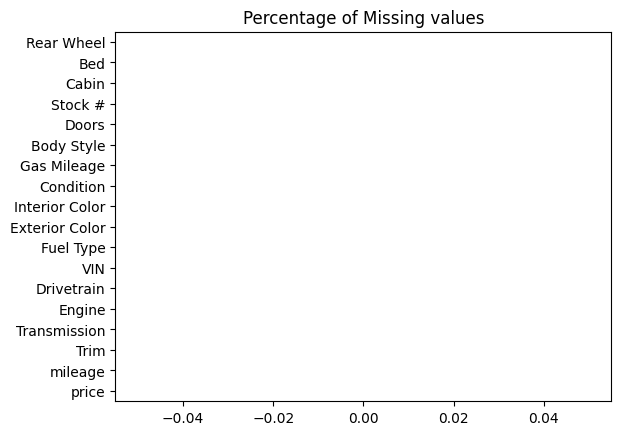

In [28]:
print("Number of Missing Values in our data set\n")
missing_df = df.isnull().sum().to_frame().reset_index().rename({"index" : 'Variable', 0: 'Missing Values'}, axis =1)
display(missing_df.style.background_gradient('gnuplot2_r'))
print("\n Percentage of Missing Values in our data set")
display((df.isnull().sum() / (len(df.index)) * 100).head(20).to_frame().rename({0:'Count'}, axis = 1).style.background_gradient('gnuplot2_r'))
round((df.isnull().sum() / (len(df.index)) * 100) , 2).plot(kind = 'barh',color ='maroon')

plt.title("Percentage of Missing values");

In [ ]:
# df['Doors'].fillna(df['Doors'].mode()[0], inplace = True)

In [ ]:
# columns_to_drop = ['Cabin', 'Bed', 'Rear Wheel']
# df = df.drop(columns=columns_to_drop)
# df

,price,mileage,Trim,Transmission,Engine,Drivetrain,VIN,Fuel Type,Exterior Color,Interior Color,Condition,Gas Mileage,Body Style,Doors,Stock #
0,4999,149499,Komfort,automatic,I-4 cyl2.0L,FWD,WVWJK73C29P002740,gasoline,Island Gray,Black,used,0.655172,sedan,4.0,PN21559B
1,4999,92468,SEL,automatic,Duratec 3.0L V6 24V,FWD,1FAFP24145G107125,gasoline,Redfire Clearcoat Metallic,Shale,used,0.730769,sedan,4.0,27470B
2,4998,172962,LX,manual,2.0L 4 Cylinder Engine,FWD,KNAFT4A24D5717273,gasoline,Clear White,Stone,used,0.735294,sedan,4.0,D5717273A
6,4999,134948,Base,automatic,2.7L V6 MPI DOHC 24V,RWD,2C3LA43R27H860231,gasoline,Blaze Red Crystal Pearlcoat/Black Cloth Top,Dk/Lt Slate Gray,used,0.692308,sedan,4.0,SK1691P
7,4923,100013,1.6 SV,automatic,1.6L I4 DOHC 16V,FWD,3N1CN7AP6CL925878,gasoline,Blue Onyx Metallic,Charcoal,used,0.789474,sedan,4.0,SK1690P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30299,30998,35749,V6 SEL 4Motion,automatic,3.6L,AWD,1V2ME2CA9LC232617,gasoline,Black,BLACK,used,0.727273,suv,4.0,24806832
30300,30998,22132,Pro S,automatic,0.0L,RWD,WVGKMPE29MP062795,electric,White,GRAY,used,1.168539,suv,4.0,25181004
30301,26998,11799,Limited,automatic,2.0L,AWD,4S3GTAU63M3700402,gasoline,Blue,TAN,used,0.777778,wagon,4.0,25133659
30302,48998,25185,RST,automatic,3.0L,4X4,3GCUYEET5MG330373,diesel,White,BLACK,used,0.846154,pickup,4.0,24985150


In [29]:
df = df.dropna()
df = df.reset_index(drop=True)
df

,price,mileage,Trim,Transmission,Engine,Drivetrain,VIN,Fuel Type,Exterior Color,Interior Color,Condition,Gas Mileage,Body Style,Doors,Stock #,Cabin,Bed,Rear Wheel
0,4999,149499,Komfort,automatic,I-4 cyl2.0L,FWD,WVWJK73C29P002740,gasoline,Island Gray,Black,used,0.655172,sedan,4.0,PN21559B,normal,no,normal
1,4999,92468,SEL,automatic,Duratec 3.0L V6 24V,FWD,1FAFP24145G107125,gasoline,Redfire Clearcoat Metallic,Shale,used,0.730769,sedan,4.0,27470B,normal,no,normal
2,4998,172962,LX,manual,2.0L 4 Cylinder Engine,FWD,KNAFT4A24D5717273,gasoline,Clear White,Stone,used,0.735294,sedan,4.0,D5717273A,normal,no,normal
3,4999,134948,Base,automatic,2.7L V6 MPI DOHC 24V,RWD,2C3LA43R27H860231,gasoline,Blaze Red Crystal Pearlcoat/Black Cloth Top,Dk/Lt Slate Gray,used,0.692308,sedan,4.0,SK1691P,normal,no,normal
4,4923,100013,1.6 SV,automatic,1.6L I4 DOHC 16V,FWD,3N1CN7AP6CL925878,gasoline,Blue Onyx Metallic,Charcoal,used,0.789474,sedan,4.0,SK1690P,normal,no,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18501,30998,35749,V6 SEL 4Motion,automatic,3.6L,AWD,1V2ME2CA9LC232617,gasoline,Black,BLACK,used,0.727273,suv,4.0,24806832,normal,no,normal
18502,30998,22132,Pro S,automatic,0.0L,RWD,WVGKMPE29MP062795,electric,White,GRAY,used,1.168539,suv,4.0,25181004,normal,no,normal
18503,26998,11799,Limited,automatic,2.0L,AWD,4S3GTAU63M3700402,gasoline,Blue,TAN,used,0.777778,wagon,4.0,25133659,normal,no,normal
18504,48998,25185,RST,automatic,3.0L,4X4,3GCUYEET5MG330373,diesel,White,BLACK,used,0.846154,pickup,4.0,24985150,crew,regular,single


In [30]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
categorical

['Trim',
 'Transmission',
 'Engine',
 'Drivetrain',
 'VIN',
 'Fuel Type',
 'Exterior Color',
 'Interior Color',
 'Condition',
 'Body Style',
 'Stock #',
 'Cabin',
 'Bed',
 'Rear Wheel']

In [31]:
for col in categorical:
    print(col)
    print(df[col].unique())
    print("Number of unique classes ",df[col].nunique())
    print('\n')

Trim
['Komfort' 'SEL' 'LX' 'Base' '1.6 SV' '2.5 S' 'LE' '1.6 S' 'E 320' 'SE'
 'GS' '2.0 SR' 'SXT' 'Sport' 'Touring' 'GLS' 'Eddie Bauer' 'EX' 'S'
 'Limited' 'LT' 'SL' 'LE 7-Passenger' 'LS' 'SLT-2' 'SLT-1' '3.5 SV'
 'LS Fleet' 'Touring-L' 'LX-P' '3.8L V6' 'LTZ' 'American Value Package'
 '3.5 SE' 'XLE' 'XLE 8-Passenger' 'XL' 'SE 2.0T' 'Big Horn'
 'Laramie Longhorn' 'SR' 'Work Truck' 'Raptor' 'XLT' 'Platinum'
 'PreRunner V6' 'High Altitude' 'Denali' 'TRD Sport' 'SR V6'
 '1794 Edition' 'SR5' 'SLT' 'SV' 'Warlock' 'LT Trail Boss' 'Custom'
 'SR5 V6' 'RTL' 'Elevation' 'Custom Trail Boss' 'Laramie' 'Express'
 'Rebel' 'Night' 'Desert Runner' 'Lariat' 'PRO-4X' 'Elevation Standard'
 'TRD Off-Road' 'King Ranch' 'Rubicon' 'Z71' 'TRD Pro HV' 'AT4' 'TRD Pro'
 'SLE' 'SEL Premium' 'Limited HV' 'High Country' 'RST' 'RTL-E' 'Pro'
 'Tremor' 'PRO-X' 'STX' '1794 Edition HV' 'ZR2' 'Tradesman' 'V6' 'RTL-T'
 'Black Edition' 'Grade' 'Trail Boss' 'Lone Star' 'Capstone HV'
 'Laramie Limited' 'PreRunner' 'LT Z71' 'S

In [32]:
columns_to_drop = ['VIN', 'Stock #', 'Trim','title']
df = df.drop(columns=columns_to_drop)
df

,price,mileage,Transmission,Engine,Drivetrain,Fuel Type,Exterior Color,Interior Color,Condition,Gas Mileage,Body Style,Doors,Cabin,Bed,Rear Wheel
0,4999,149499,automatic,I-4 cyl2.0L,FWD,gasoline,Island Gray,Black,used,0.655172,sedan,4.0,normal,no,normal
1,4999,92468,automatic,Duratec 3.0L V6 24V,FWD,gasoline,Redfire Clearcoat Metallic,Shale,used,0.730769,sedan,4.0,normal,no,normal
2,4998,172962,manual,2.0L 4 Cylinder Engine,FWD,gasoline,Clear White,Stone,used,0.735294,sedan,4.0,normal,no,normal
3,4999,134948,automatic,2.7L V6 MPI DOHC 24V,RWD,gasoline,Blaze Red Crystal Pearlcoat/Black Cloth Top,Dk/Lt Slate Gray,used,0.692308,sedan,4.0,normal,no,normal
4,4923,100013,automatic,1.6L I4 DOHC 16V,FWD,gasoline,Blue Onyx Metallic,Charcoal,used,0.789474,sedan,4.0,normal,no,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18501,30998,35749,automatic,3.6L,AWD,gasoline,Black,BLACK,used,0.727273,suv,4.0,normal,no,normal
18502,30998,22132,automatic,0.0L,RWD,electric,White,GRAY,used,1.168539,suv,4.0,normal,no,normal
18503,26998,11799,automatic,2.0L,AWD,gasoline,Blue,TAN,used,0.777778,wagon,4.0,normal,no,normal
18504,48998,25185,automatic,3.0L,4X4,diesel,White,BLACK,used,0.846154,pickup,4.0,crew,regular,single


In [33]:
numerical = [col for col in df.columns if col not in categorical]
for i in numerical:
    df[df[i]<0]
    print("Records with Negative values in %s : " %i,df[df[i]<0])
    print('\n')

Records with Negative values in price :  Empty DataFrame
Columns: [price, mileage, Transmission, Engine, Drivetrain, Fuel Type, Exterior Color, Interior Color, Condition, Gas Mileage, Body Style, Doors, Cabin, Bed, Rear Wheel]
Index: []


Records with Negative values in mileage :  Empty DataFrame
Columns: [price, mileage, Transmission, Engine, Drivetrain, Fuel Type, Exterior Color, Interior Color, Condition, Gas Mileage, Body Style, Doors, Cabin, Bed, Rear Wheel]
Index: []


Records with Negative values in Gas Mileage :  Empty DataFrame
Columns: [price, mileage, Transmission, Engine, Drivetrain, Fuel Type, Exterior Color, Interior Color, Condition, Gas Mileage, Body Style, Doors, Cabin, Bed, Rear Wheel]
Index: []


Records with Negative values in Doors :  Empty DataFrame
Columns: [price, mileage, Transmission, Engine, Drivetrain, Fuel Type, Exterior Color, Interior Color, Condition, Gas Mileage, Body Style, Doors, Cabin, Bed, Rear Wheel]
Index: []




In [35]:
df.corr().style.background_gradient("copper_r")

,price,mileage,Gas Mileage,Doors
price,1.000000,-0.511052,0.084074,0.071728
mileage,-0.511052,1.000000,-0.226191,-0.169702
Gas Mileage,0.084074,-0.226191,1.000000,0.090256
Doors,0.071728,-0.169702,0.090256,1.000000


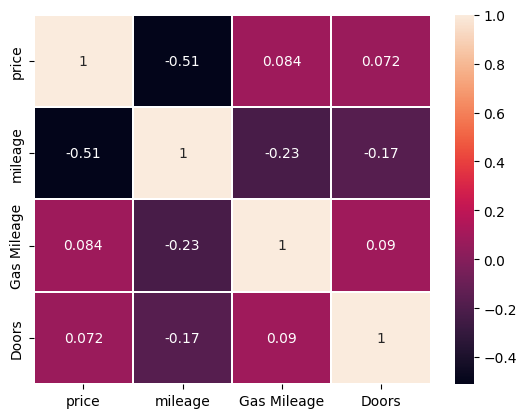

In [36]:
sns.heatmap(df.corr(),annot = True, lw = 0.1);

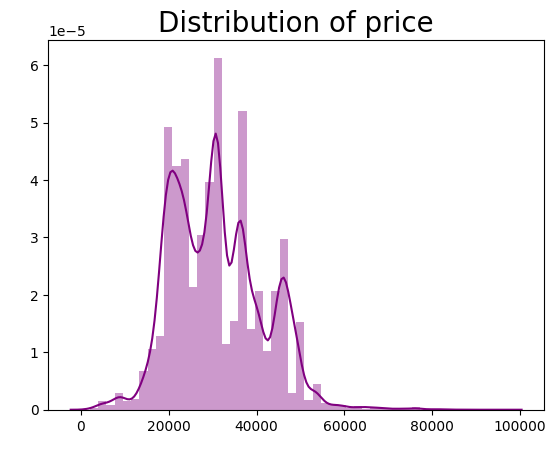

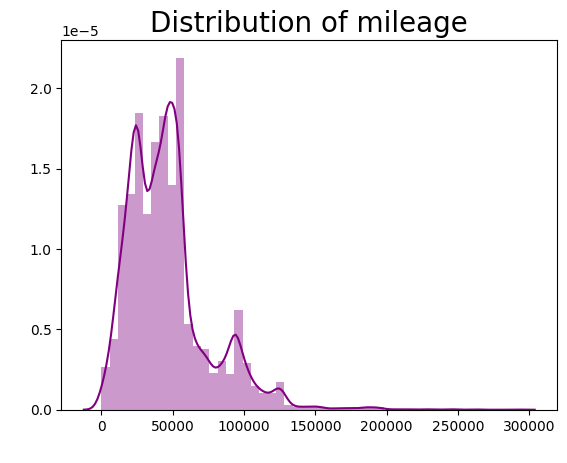

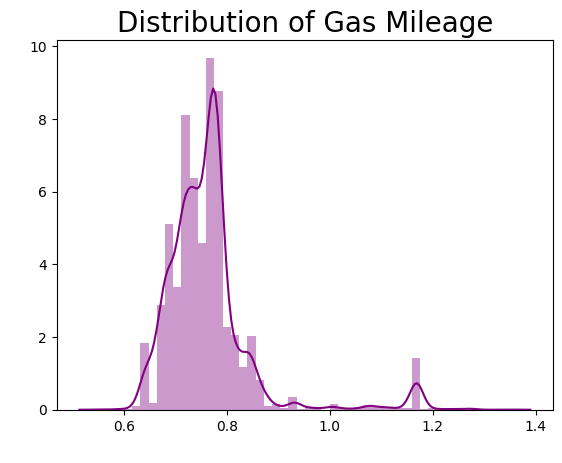

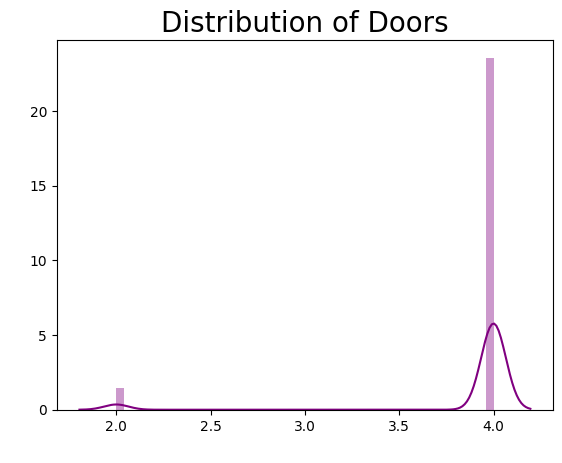

In [37]:
numerical = [col for col in df.columns if col not in categorical]
for i in numerical:

    ax = sns.distplot(df[i], color = 'purple')
    plt.title("Distribution of %s" %i, fontsize = 20)
    plt.xlabel(" ")
    plt.ylabel(" ")
    plt.xticks(fontsize = 10)
    plt.show();
    print('\n')

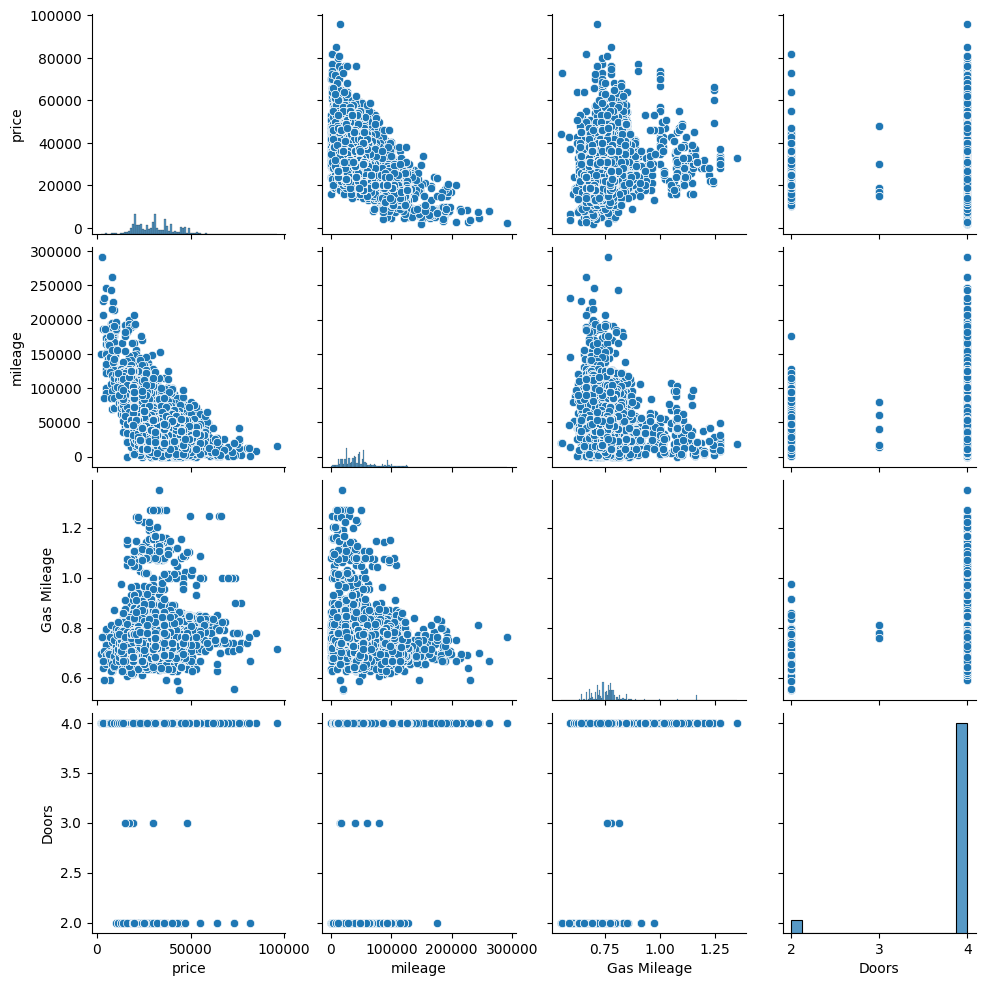

In [38]:
sns.pairplot(df)

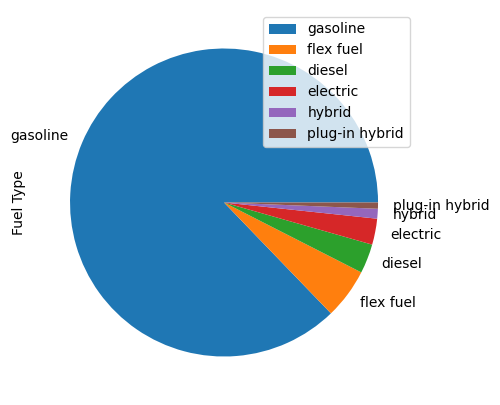

In [39]:
data=pd.DataFrame(df['Fuel Type'].value_counts())
plot = data.plot.pie(y='Fuel Type', figsize=(5, 5))

<Axes: xlabel='price', ylabel='Density'>

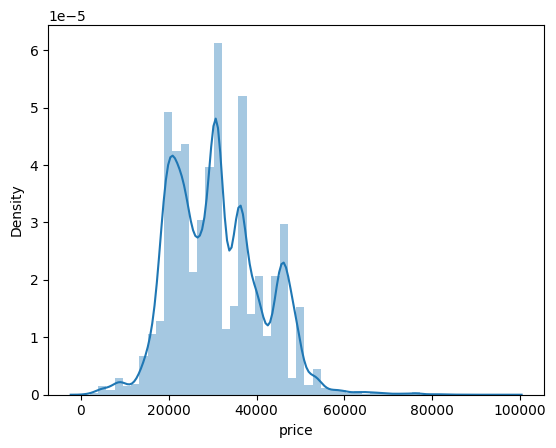

In [40]:
sns.distplot(df['price'],kde=True)

Text(0.5, 1.0, 'Distribution of ages of diesel vehicles')

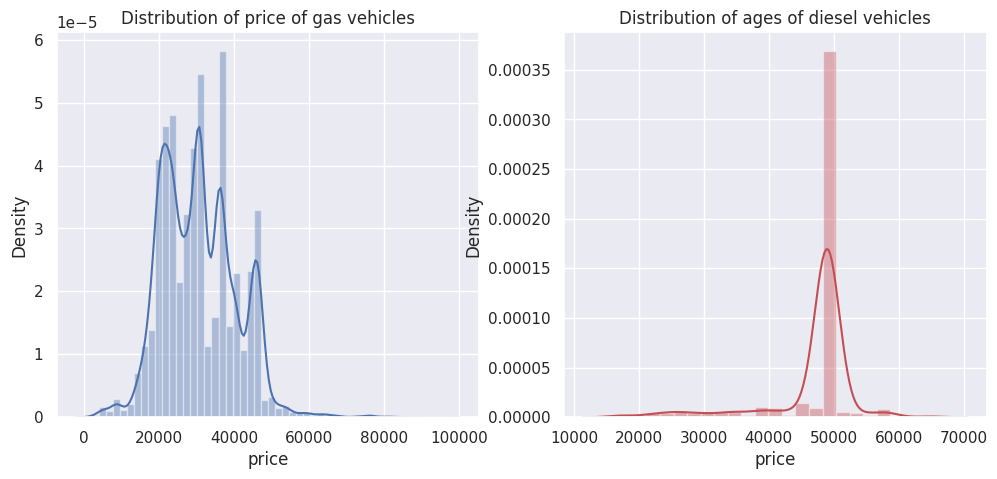

In [44]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df['Fuel Type'] == 'gasoline')]["price"],color='b',ax=ax)
ax.set_title('Distribution of price of gas vehicles')

ax=f.add_subplot(122)
sns.distplot(df[(df['Fuel Type'] == 'diesel')]['price'],color='r',ax=ax)
ax.set_title('Distribution of ages of diesel vehicles')

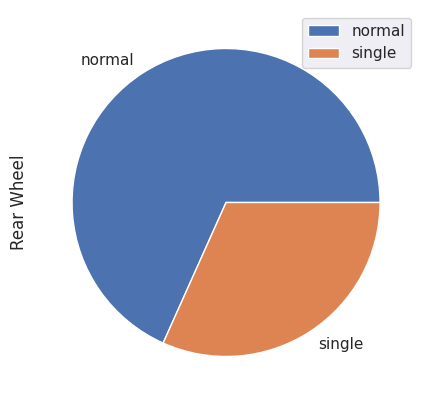

In [45]:
data=pd.DataFrame(df['Rear Wheel'].value_counts())
plot = data.plot.pie(y='Rear Wheel', figsize=(5, 5))

Text(0.5, 1.0, 'Distribution of ages of single rear wheel')

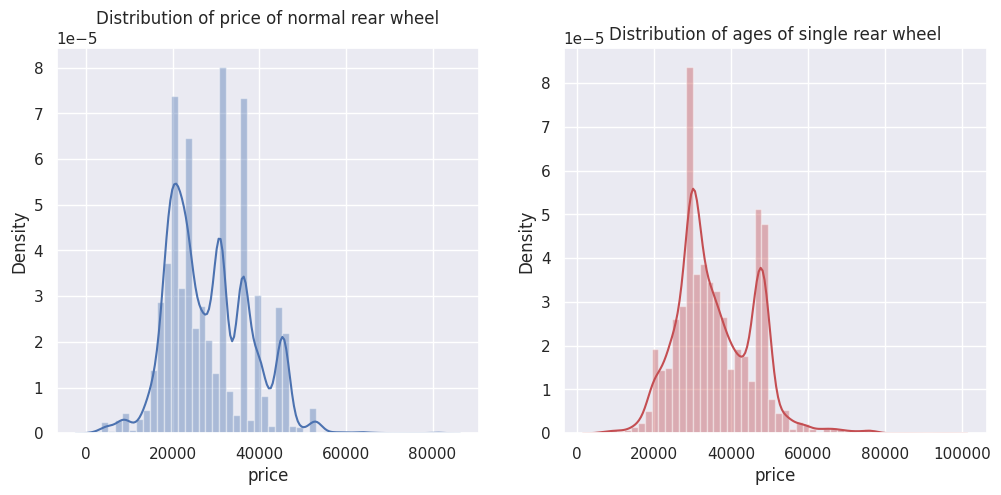

In [46]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df['Rear Wheel'] == 'normal')]["price"],color='b',ax=ax)
ax.set_title('Distribution of price of normal rear wheel')

ax=f.add_subplot(122)
sns.distplot(df[(df['Rear Wheel'] == 'single')]['price'],color='r',ax=ax)
ax.set_title('Distribution of ages of single rear wheel')

<Axes: xlabel='Rear Wheel', ylabel='price'>

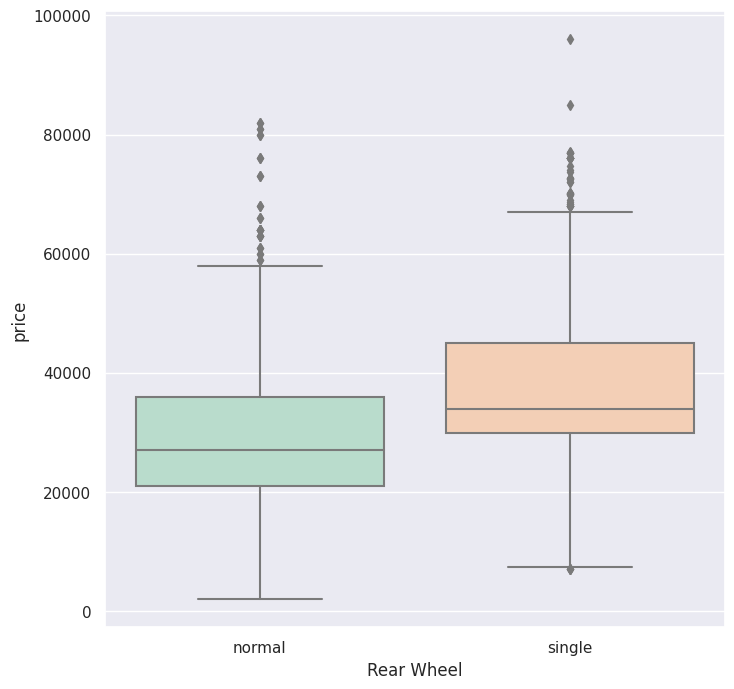

In [47]:
sns.boxplot(x = 'Rear Wheel', y = 'price', data = df,palette='Pastel2')

Text(0.5, 1.0, 'Price distribution of certified pre-owned cars')

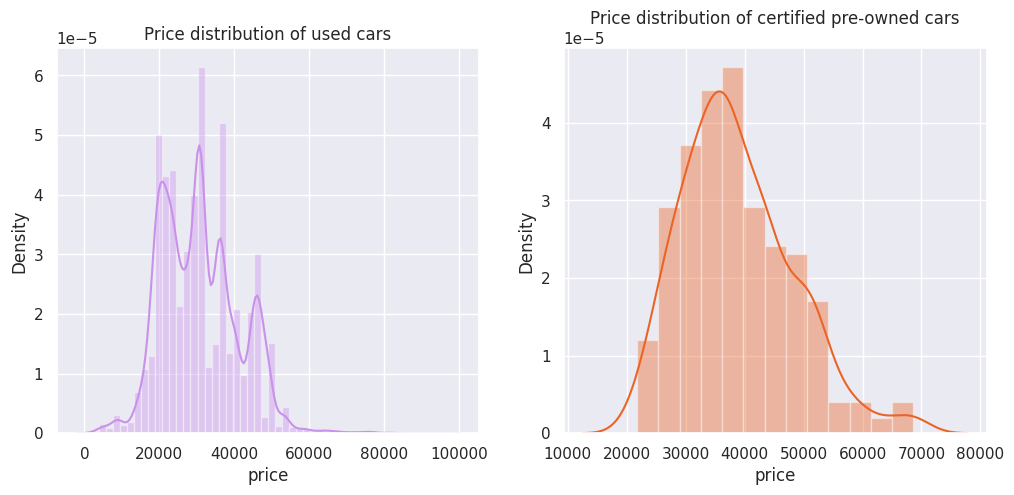

In [48]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
plot=sns.distplot(df[(df['Condition']== 'used')]["price"],color='#ca91eb',ax=ax)
ax.set_title('Price distribution of used cars')

ax=f.add_subplot(122)
plot=sns.distplot(df[(df['Condition'] == 'certified pre-owned')]['price'],color='#eb6426',ax=ax)
ax.set_title('Price distribution of certified pre-owned cars')

<Axes: xlabel='Condition', ylabel='price'>

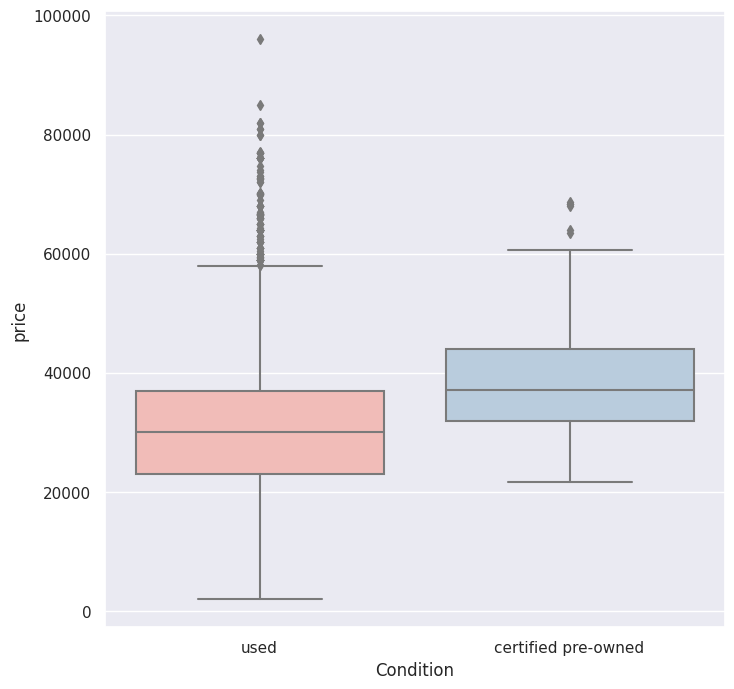

In [49]:
sns.boxplot(x = 'Condition', y = 'price', data = df,palette='Pastel1')

<Axes: xlabel='Body Style', ylabel='count'>

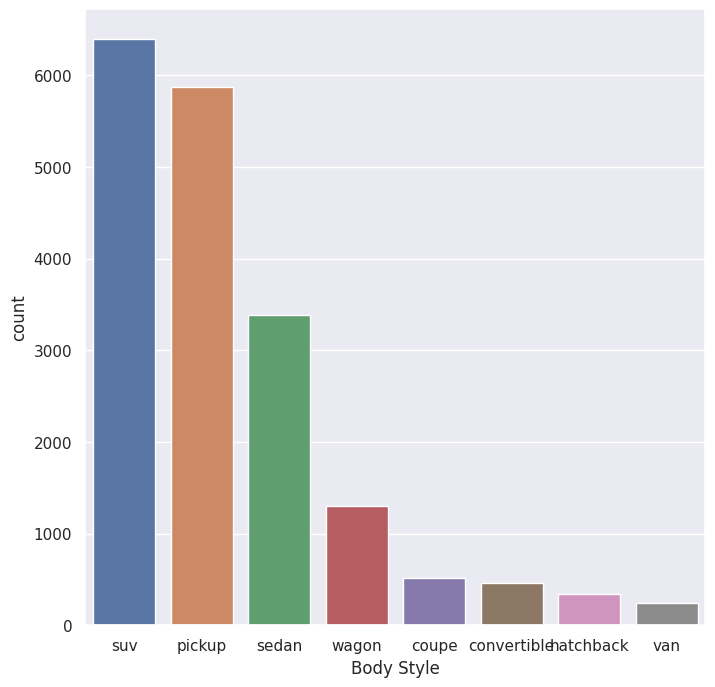

In [50]:
data=pd.DataFrame(df['Body Style'].value_counts()).reset_index().rename(columns={'index':'Body Style','Body Style':'count'})
sns.barplot(x='Body Style',y='count',data=data)

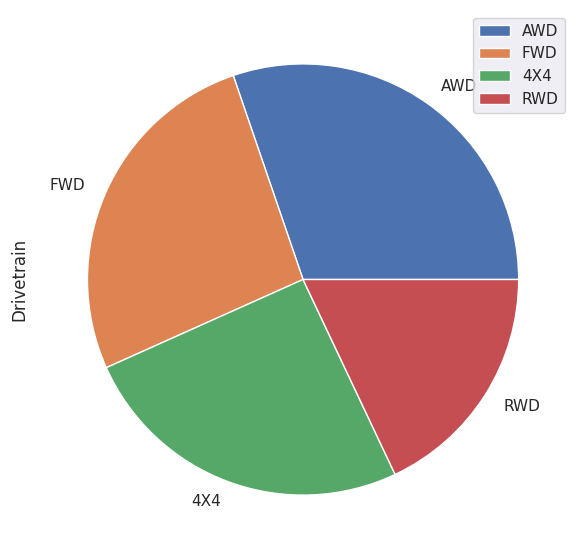

In [56]:
data=pd.DataFrame(df['Drivetrain'].value_counts())
plot = data.plot.pie(y='Drivetrain', figsize=(7, 7))

<Axes: xlabel='Drivetrain', ylabel='price'>

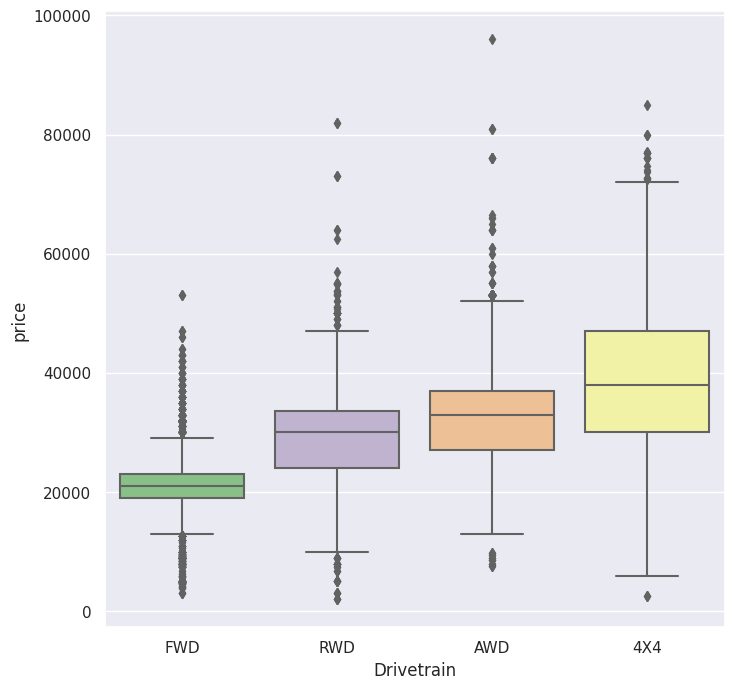

In [58]:
sns.boxplot(x = 'Drivetrain', y = 'price', data = df,palette='Accent')

In [ ]:
#Creating a function for ordering the groups in a column as per their frequency
def sort_order(column):
    orders = (df.groupby([column]).mean().sort_values(by ='price', ascending = False)).index
    return orders

In [ ]:
df

,price,mileage,Transmission,Engine,Drivetrain,Fuel Type,Exterior Color,Interior Color,Condition,Gas Mileage,Body Style,Doors,Cabin,Bed,Rear Wheel
0,4999,149499,automatic,I-4 cyl2.0L,FWD,gasoline,Island Gray,Black,used,0.655172,sedan,4.0,normal,no,normal
1,4999,92468,automatic,Duratec 3.0L V6 24V,FWD,gasoline,Redfire Clearcoat Metallic,Shale,used,0.730769,sedan,4.0,normal,no,normal
2,4998,172962,manual,2.0L 4 Cylinder Engine,FWD,gasoline,Clear White,Stone,used,0.735294,sedan,4.0,normal,no,normal
3,4999,134948,automatic,2.7L V6 MPI DOHC 24V,RWD,gasoline,Blaze Red Crystal Pearlcoat/Black Cloth Top,Dk/Lt Slate Gray,used,0.692308,sedan,4.0,normal,no,normal
4,4923,100013,automatic,1.6L I4 DOHC 16V,FWD,gasoline,Blue Onyx Metallic,Charcoal,used,0.789474,sedan,4.0,normal,no,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18501,30998,35749,automatic,3.6L,AWD,gasoline,Black,BLACK,used,0.727273,suv,4.0,normal,no,normal
18502,30998,22132,automatic,0.0L,RWD,electric,White,GRAY,used,1.168539,suv,4.0,normal,no,normal
18503,26998,11799,automatic,2.0L,AWD,gasoline,Blue,TAN,used,0.777778,wagon,4.0,normal,no,normal
18504,48998,25185,automatic,3.0L,4X4,diesel,White,BLACK,used,0.846154,pickup,4.0,crew,regular,single


In [59]:
import copy
df2 = copy.deepcopy(df)

In [60]:
df['Transmission'] = df['Transmission'].astype('category').cat.codes + 1
df['Engine'] = df['Engine'].astype('category').cat.codes + 1
df['Drivetrain'] = df['Drivetrain'].astype('category').cat.codes + 1
df['Exterior Color'] = df['Exterior Color'].astype('category').cat.codes + 1
df['Interior Color'] = df['Interior Color'].astype('category').cat.codes + 1
df['Condition'] = df['Condition'].astype('category').cat.codes + 1
df['Body Style'] = df['Body Style'].astype('category').cat.codes + 1
df['Fuel Type'] = df['Fuel Type'].astype('category').cat.codes + 1
df['Cabin'] = df['Cabin'].astype('category').cat.codes + 1
df['Bed'] = df['Bed'].astype('category').cat.codes + 1
df['Rear Wheel'] = df['Rear Wheel'].astype('category').cat.codes + 1

In [62]:
df.dtypes

price               int64
mileage             int64
Transmission         int8
Engine              int16
Drivetrain           int8
Fuel Type            int8
Exterior Color      int16
Interior Color      int16
Condition            int8
Gas Mileage       float64
Body Style           int8
Doors             float64
Cabin                int8
Bed                  int8
Rear Wheel           int8
dtype: object

In [ ]:
# from sklearn import preprocessing

# label_encoder = preprocessing.LabelEncoder()

# for col in ['Transmission','Engine','Drivetrain','Exterior Color','Interior Color','Condition', 'Body Style', 'Gas Mileage']: df[col] = label_encoder.fit_transform(df[col])

In [63]:
df.head()

,price,mileage,Transmission,Engine,Drivetrain,Fuel Type,Exterior Color,Interior Color,Condition,Gas Mileage,Body Style,Doors,Cabin,Bed,Rear Wheel
0,4999,149499,1,231,3,4,125,10,2,0.655172,5,4.0,3,2,1
1,4999,92468,1,186,3,4,188,117,2,0.730769,5,4.0,3,2,1
2,4998,172962,2,13,3,4,68,120,2,0.735294,5,4.0,3,2,1
3,4999,134948,1,55,4,4,31,58,2,0.692308,5,4.0,3,2,1
4,4923,100013,1,10,3,4,37,37,2,0.789474,5,4.0,3,2,1


In [64]:
x = df[['mileage','Transmission','Engine','Drivetrain','Fuel Type','Exterior Color',
        'Interior Color','Condition','Gas Mileage', 'Body Style', 'Doors', 'Cabin', 'Bed', 'Rear Wheel']].values
y = df['price'].values

print(x.shape)
print(y.shape)

(18506, 14)
(18506,)


In [65]:
#normalizing the data
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()

x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y.reshape(-1,1))

In [66]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(14804, 14)
(14804, 1)
(3702, 14)
(3702, 1)


In [67]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

# calculating the accuracies
print("Training Accuracy :",lr_model.score(x_train,y_train))
print("Testing Accuracy :",lr_model.score(x_test,y_test))

Training Accuracy : 0.5698083512164982
Testing Accuracy : 0.5822526184388059


In [68]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(x_train,y_train)
y_train_pred = dt_regressor.predict(x_train)
y_test_pred = dt_regressor.predict(x_test)
dt_regressor.score(x_test,y_test)

0.9118835298029978

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV

In [70]:
Rf = RandomForestRegressor(n_estimators = 15,
                              criterion = 'friedman_mse',
                              random_state = 20,
                              n_jobs = -1)
Rf.fit(x_train,y_train)
Rf_train_pred = Rf.predict(x_train)
Rf_test_pred = Rf.predict(x_test)


r2_score(y_test,Rf_test_pred)

0.9444913333659685

In [71]:
y_pred = Rf.predict(x_test)
y_pred[0:5]

array([-0.08531159, -1.25429728, -0.86678821, -0.46636217,  1.36138894])

Text(0, 0.5, 'Predicted Values')

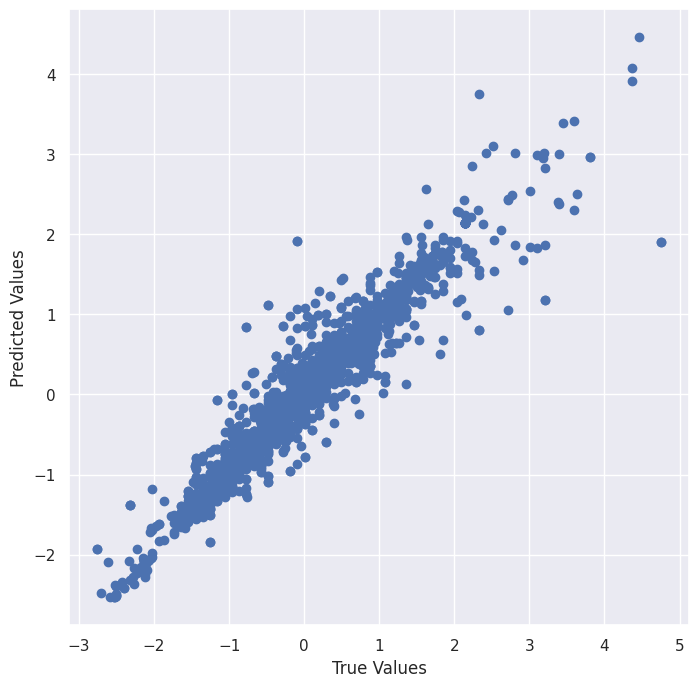

In [72]:
plt.scatter(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

In [73]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

print("Mean Squared Error : ", mean_squared_error(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))
print("RSME : ",math.sqrt(mean_squared_error(y_test,y_pred)))

Mean Squared Error :  0.05644901439915539
MAE :  0.0998532528359185
RSME :  0.23759001325635593


In [74]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state = 123 , max_depth = 7 , learning_rate = 0.2 , n_estimators = 1500)
xgb.fit(x_train,y_train)

xgb_train_pred = xgb.predict(x_train)
xgb_test_pred = xgb.predict(x_test)


r2_score(y_test,xgb_test_pred)

0.970098024206355